# Importacion y tratamiento de datos en PowerBi

## La idea es este cuaderno es aplicar algunos conceptos basicos para el tratamiento de los datos de entrada, para luego generar un modelo relacional y visualizar la información contenida en los datos.

### Con este objetivo en mente, primeramente se trabajara con un set de datos de un trabajo anterior (Carpeta de Logistica) y se buscará corregir algunos de sus datos iniciales, para asi luego poder trabajar con una base de datos limpia. En particular, estos datos de entrada se encuentran contenidos en archivos .csv, lo cual facilita la lectura de columnas y filas.


## ¿Como cargar los datos desde una carpeta local al programa de PowerBi Desktop?

Desde la pantalla de inicio, escoger la opcion de 'Obtener datos'.
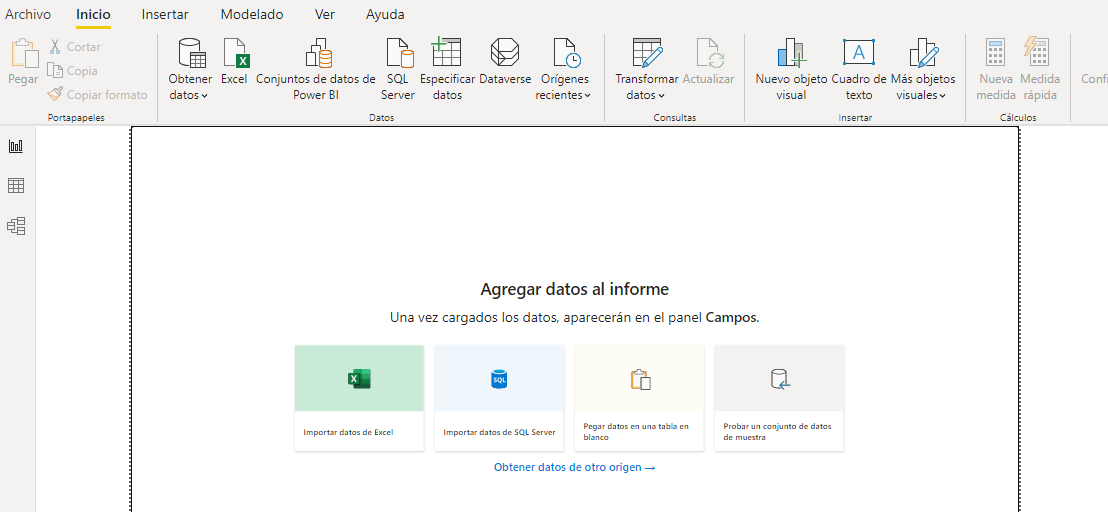

Estas nos desplegará un set de opciones para escoger, dependiendo de la naturaleza del archivo que buscamos cargar. Dado que los documentos que utilizaremos son de extension .csv debemos seleccionar la alternativa 'Texto o CSV'.
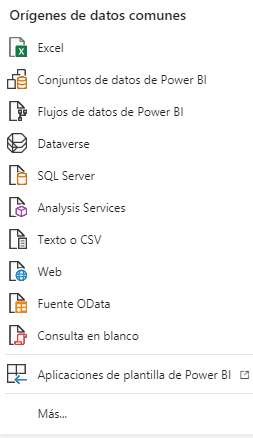

Luego al seleccionar un archivo ('Customers.csv' por ejemplo) nos debiese aparecer la siguiente pestaña.
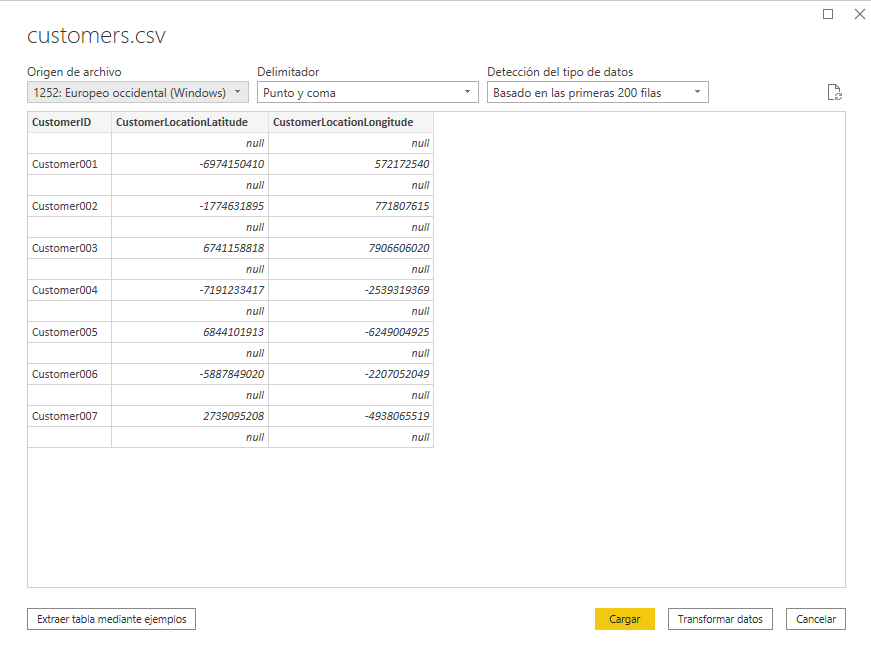

En esta podremos notar, primeramente el tipo de delimitador que el programa utilizó para separar las columnas (para archivos csv generalemte se utiliza como delimitador el ';'). Asimismo, mas abajo aparece como una previsualizacion de los datos que serian importados al modelo. **Notar que en la importación de datos se generaron filas sin valores** (esto esta hecho a proposito)**, con lo cual seria necesario corregir este error abriendo la interfaz de PowerQuery, seleccionando la opcion de 'Transformar datos'.**

### A partir de aqui, nos debiese abrir una pestaña adicional como la siguiente.
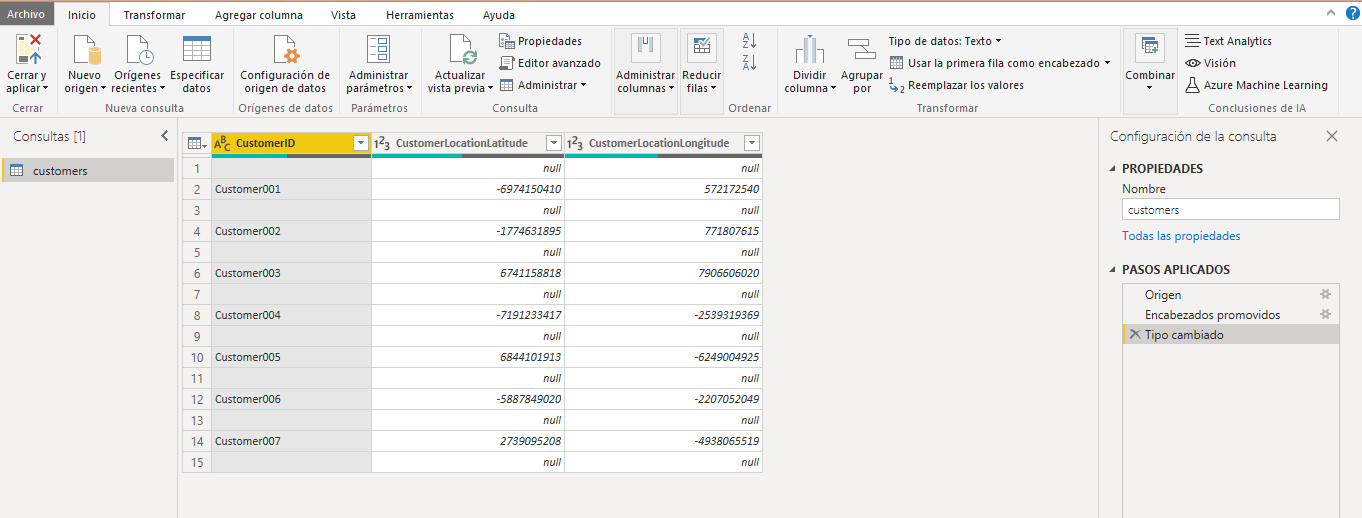

Particularmente de esta interfaz, existen bastantes herramientas para el tratamiento de datos. En consecuencia, como una primera recomendación seria tener activadas las opciones 'Mostrar espacios en blanco', 'Calidad de columnas' y 'Distribución de columnas', ya que estas en concreto nos permitiran realizar un analisis mas rapido de la calidad en que se encuentran los datos.
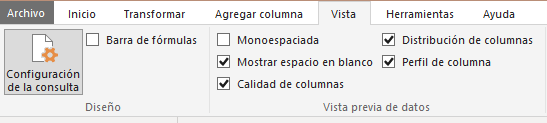

Al tener estas opciones marcadas, se agregara a la previsualizacion informacion adicional en cuanto a la distribucion de los datos (Para saber si existen datos repetidos), la cantidad de datos vacios y la forma original de como fueron extraidos los datos (respetando los espacios).
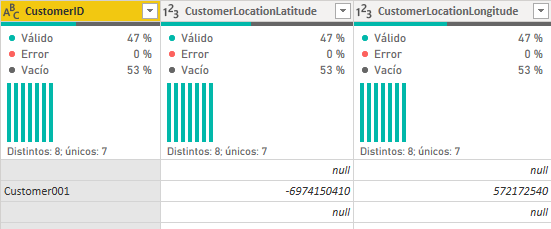

Una primera observación del analisis de los datos, son la existencia de valores vacios y la cantidad de valores unicos (**Relacionandolo un poco con el curso de base de datos, es una buena medida definir para una tabla un unico atributo con el cual, luego identificar el resto de los valores. Ojo asegurar que esta columna solo posea valores unicos**). De esta manera un primer objetivo será eliminar aquellos datos vacios. En particular esto es bastante sencillo de hacer, solo basta hacer click en la seccion de filtros de una columna y alli se tiene como opcion 'Quitar vacios'. (Como recomendación, hacer esto para la columna que se utilizara como identificador)
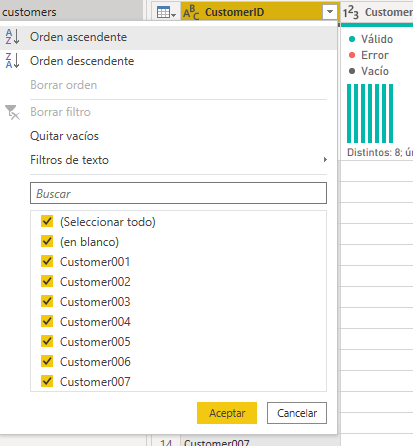

Una vez realizado esto, ahora la previsualizacion debiese observarse de la siguiente manera.
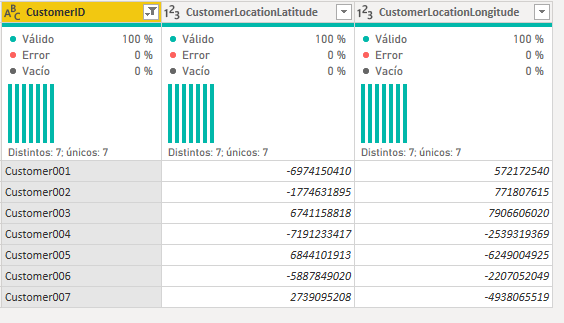


### Notas Adicionales

1) Cada vez que realizamos un cambio en las tablas, estos aparecen a la derecha en la ventana de 'Pasos aplicados'.
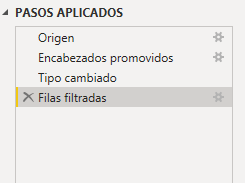
Estos son posibles de modificar, desde la barra de formulas. (**Tambien se puede alterar el orden en que son aplicados**)
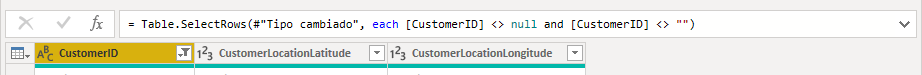

2) Para habilitar la barra de formulas, ir al la pestaña 'Vista' y marcar la casilla donde aparece 'Barra de formulas'.
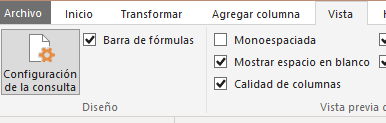

3) Para cambiar el tipo de dato de las columnas, hacer click a la izquierda del nombre y apareceran los tipos disponibles.
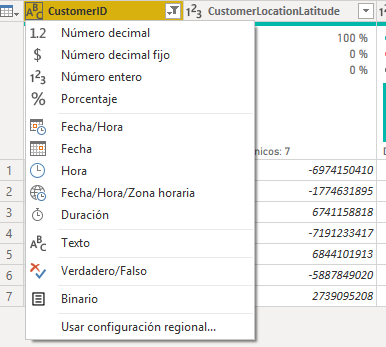

4) Para cargar otro archivo, ir a 'Nuevo origen' o 'Origen reciente' (**Para este caso se cargo un nuevo archivo llamado 'orders.csv'**). Ojo que tambien corresponde volver a analizar y corregir los datos.
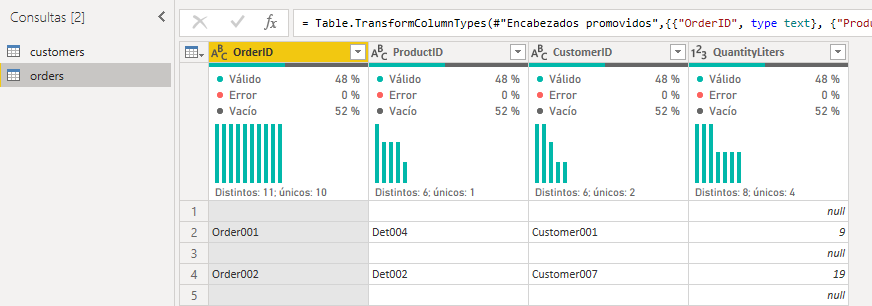

5) Para reemplazar uno o mas valores (**si son mas valores, seleccionar manteniendo presionado el Ctrl**) hacer click derecho y seleccionar 'Remplazar los valores...'. Luego les aparecera una ventana para reemplazar el valor de los elementos o columnas seleccionados.
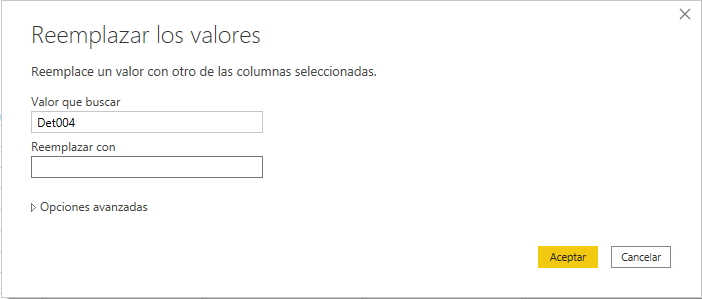

6) Para observar el origen y la dependencia de los datos. Ir a la pestaña vista, al final a la derecha en 'Dependencia de la consulta'. Se abrirá una pestaña como a continuación.
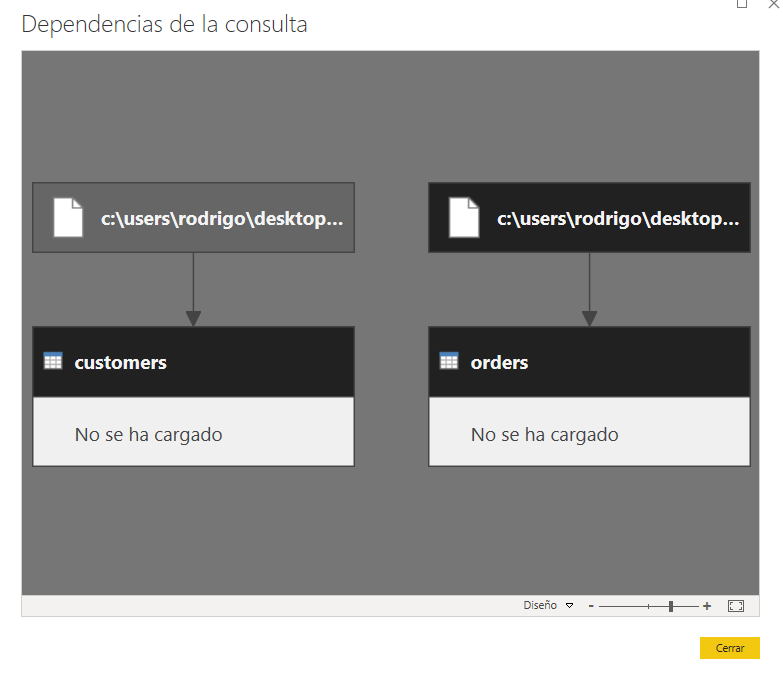

7) Seleccionar las tablas que se cargaran al modelo. Hacer click derecho en la tabla y tener seleccionada la opcion 'Habilitar carga'. (**ojo, las tablas que aparecen en cursiva no se cargaran**)
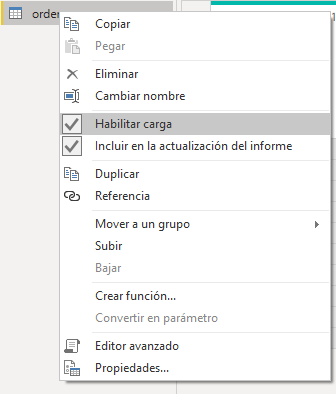

8) Para crear una tabla a partir de las ya existentes. Hacer click derecho en la tabla y seleccionar la opcion 'Duplicar' o 'Referencia'. En ambas opciones se crea una tabla igual a la anterior, pero varian en sus dependencias. Si vamos nuevamente al cuadro de dependencia podria quedar mucho mas claro, ya que a la tabla 'Customers' se le aplico 'Duplicar' y a la tabla 'orders' se le aplico 'Referencia'. **De esta manera, la diferencia se hace patente al modificar las tablas originales, ya que la nueva tabla de 'customers (2)' no cambiará, pero no es así para el caso de la nueva tabla 'orders (2)'**.
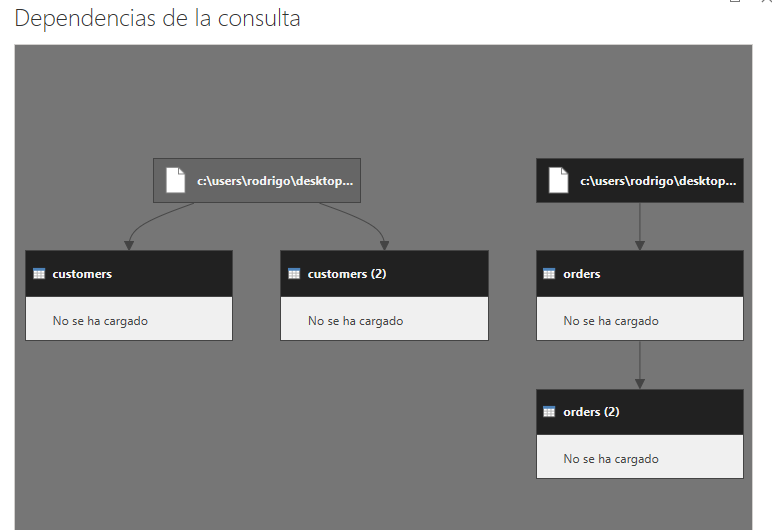

9) Para crear una nueva tabla desde cero. En el menu de inicio dar click en 'Especificar datos'. Esta abrirá una nueva pestaña con la cual podremos ir creando filas y columnas.
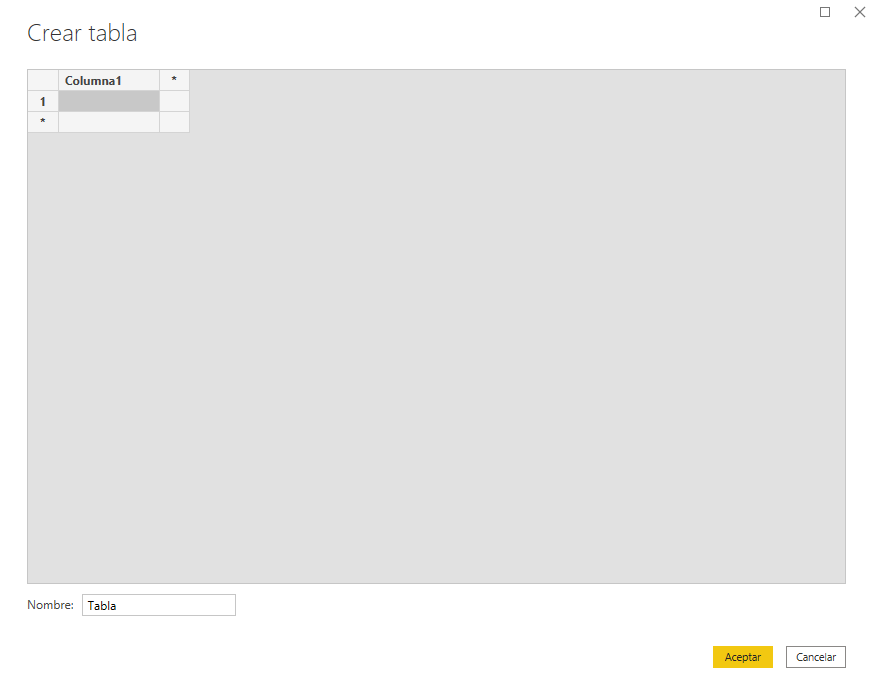







## Importar datos utilizando script de Python

### Esta opción la encuentró particularmente interesante, en el sentido que se puede sacar provecho de los conocimientos de otro lenguaje de programación, con el que nos encontremos mayormente familiarizados para el tratamiento y el analisis de los datos.

### Nota: Al entorno virtual fue necesario agregar la biblioteca de matplotlib, ademas de las anteriormente instaladas (pandas)

Ahora probemos a ver como funciona esta modalidad para crear una tabla desde cero. En consecuencia vayamos al menu de inicio y demos click en 'Obtener datos', en la opción 'Más'.
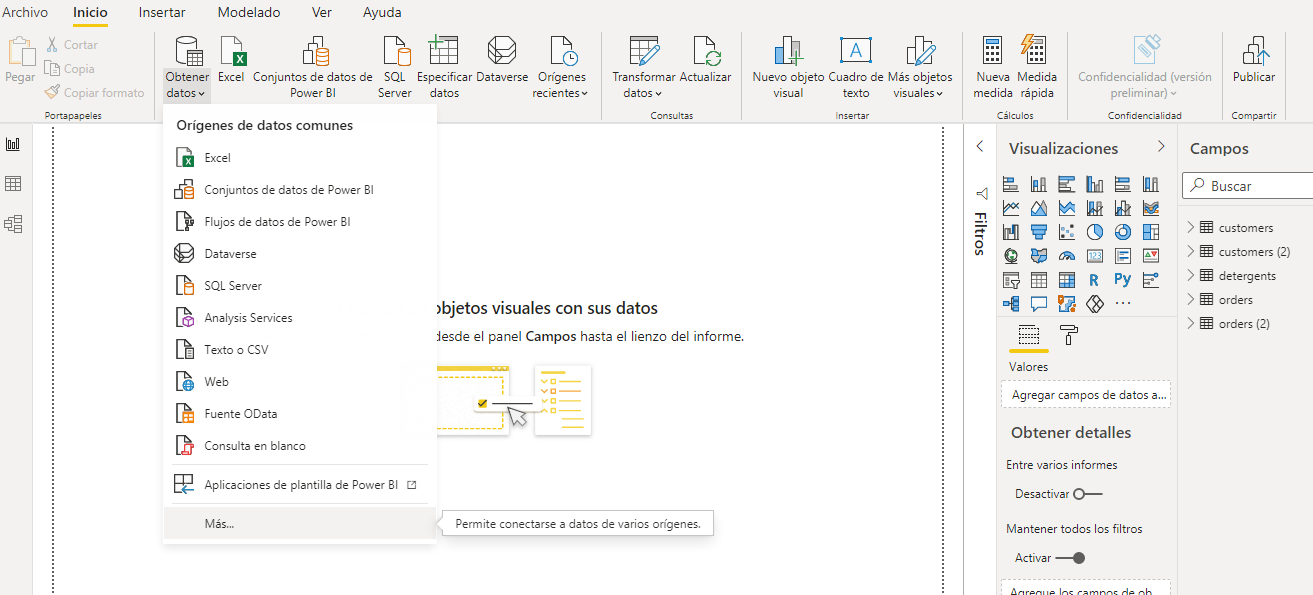

Esta nos abrirá una nueva pestaña, en esta a la izquierda debemos seleccionar 'Otras' y en el recuadro a la derecha escoger 'Script de Python'.
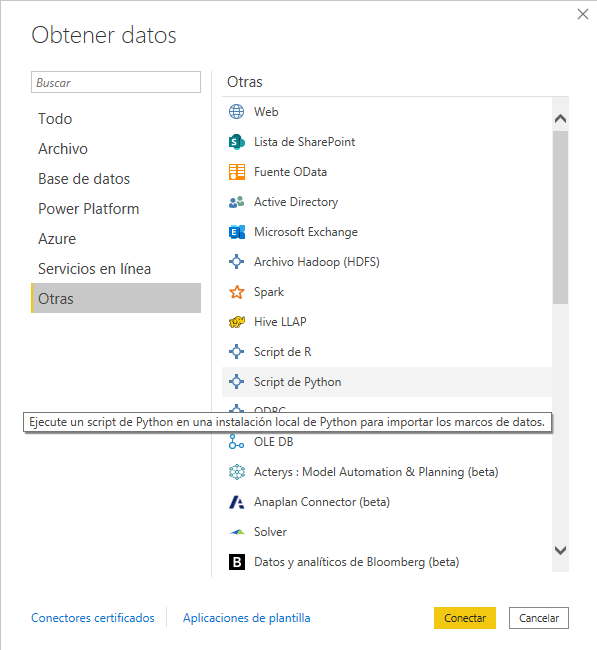

Esto nos abrirá la siguiente pestaña, donde ya podremos programar para la elaboracion de una tabla de datos o cargar un archivo. (**ojo que tambien podemos realizar modificacion desde aqui, antes siquiera de aplicar metodos para arreglar los datos de entrada**)
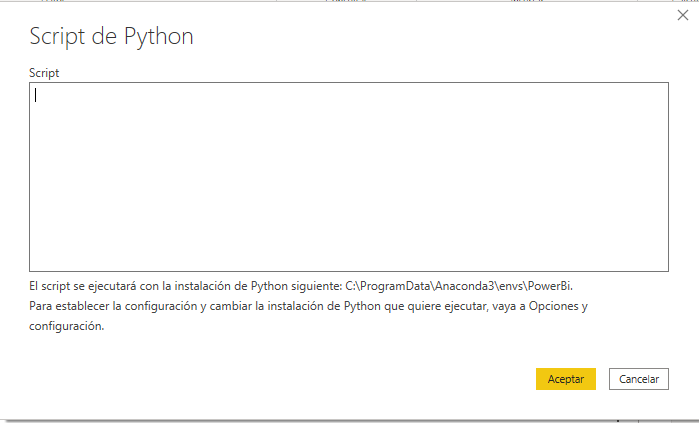

Copiemos el codigo que aparece abajo y verifiquemos que la conexion se haya establecido correctamente.


In [1]:
# Tabla de prueba

import pandas as pd

df1 = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(df1)

   0  1  2
0  1  2  3
1  4  5  6
2  7  8  9


In [2]:
# Importar desde una direccion local
import pandas as pd

dir = 'C:/Users/rodrigo/Desktop/github/Cursos/Power BI/set de datos 2/customers.csv'
df2 = pd.read_csv(dir, sep = ';')
df2

,CustomerID,CustomerLocationLatitude,CustomerLocationLongitude
0,Customer001,-6.974.150.410,0.572.172.540
1,Customer002,-1.774.631.895,0.771.807.615
2,Customer003,6.741.158.818,7.906.606.020
3,Customer004,-7.191.233.417,-2.539.319.369
4,Customer005,6.844.101.913,-6.249.004.925
5,Customer006,-5.887.849.020,-2.207.052.049
6,Customer007,2.739.095.208,-4.938.065.519


In [3]:
# Importar desde el repositorio de github
# NOTA: Esta actualmente no me esta funcionando ejecutarla desde PowerBi

url = 'https://raw.githubusercontent.com/raaraya1/University-Projects/main/Logistics/Datos/customers.csv'

df3 = pd.read_csv(url ,sep=';')
df3

,CustomerID,CustomerLocationLatitude,CustomerLocationLongitude
0,Customer001,-6.974.150.410,0.572.172.540
1,Customer002,-1.774.631.895,0.771.807.615
2,Customer003,6.741.158.818,7.906.606.020
3,Customer004,-7.191.233.417,-2.539.319.369
4,Customer005,6.844.101.913,-6.249.004.925
5,Customer006,-5.887.849.020,-2.207.052.049
6,Customer007,2.739.095.208,-4.938.065.519


### Una buena recomendacion es probar el codigo desde algun IDE de Python para asi verificar que se este ejecutando correctamente el codigo.

**Una vez ejecutado el codigo desde PowerBi, debiese aparecernos una pestaña como la siguiente.**
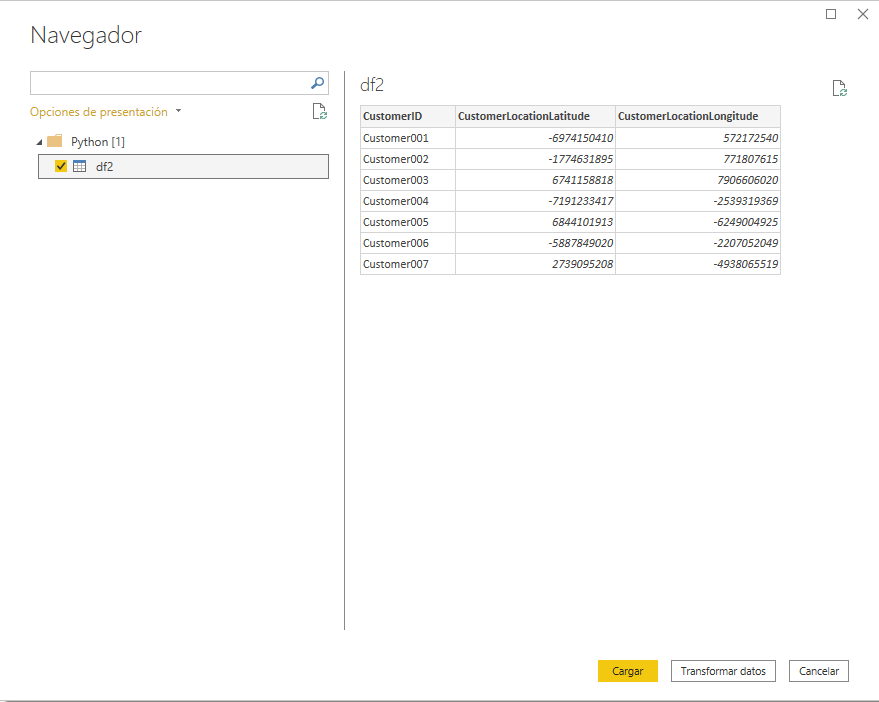

**Por ultimo, mencionar que se pueden aplicar transformaciones y limpieza de datos al momento de importar o incluso despues.** Notar que en la ventana de Power Query, en la pestaña 'Transformar' al final a la derecha, existe un boton llamado 'Ejecutar script de Python' con el cual tambien se pueden aplicar scripts de Python.
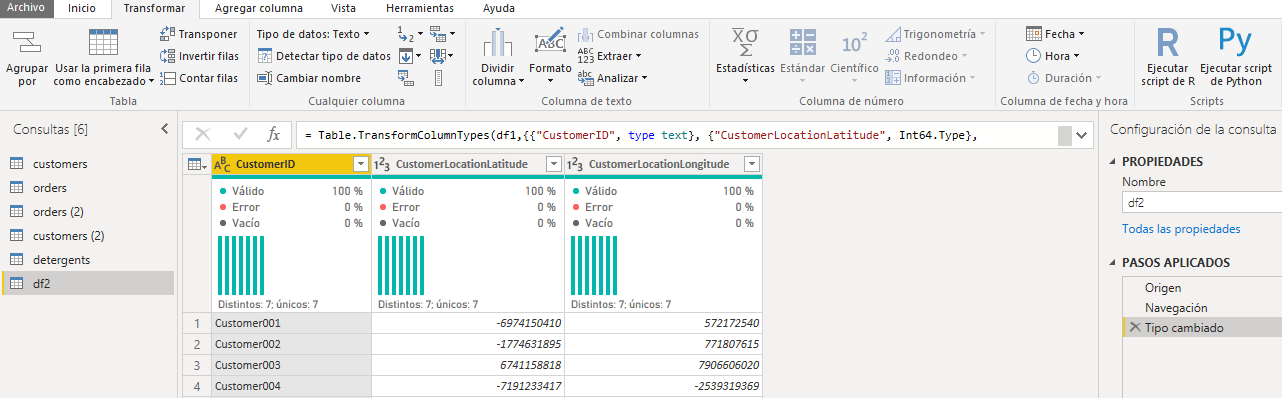

In [4]:
# ejemplo de modificacion de datos

# Importar desde una direccion local
import pandas as pd

dir = 'C:/Users/rodrigo/Desktop/github/Cursos/Power BI/set de datos 2/customers.csv'
df1 = pd.read_csv(dir, sep = ';')
print('Tabla original \n', df1, '\n')


# Transformar los datos de una columna segun algun criterio
df2 = df1.copy()
for i, valor in enumerate(df1['CustomerLocationLongitude']):
    valor1 = valor[:3] # Me toma las tres primeras letras
    if float(valor1) >= 1.0:
        df2['CustomerLocationLongitude'][i] = 'Alto'
    else:
        df2['CustomerLocationLongitude'][i] = 'Bajo'
print('Tabla modificada segun criterio \n', df2, '\n')

# Acortar una tabla (Ejemplo con las primeras dos culumnas y las tres primeras filas)
df3 = df1[['CustomerID', 'CustomerLocationLatitude']][:3]
print('Tabla recortada \n', df3, '\n')

# Añadir una nueva columna (Igual que df2, pero en lugar de modificar los datos de la columna, esta se la vamos a sumar)
#    primero generamos la nueva lista
nueva_columna = []
for i, valor in enumerate(df1['CustomerLocationLongitude']):
    valor1 = valor[:3] # Me toma las tres primeras letras
    if float(valor1) >= 1.0:
        nueva_columna.append('Alto')
    else:
        nueva_columna.append('Bajo')

#    Luego sumamos esta lista como una nueva columna
df4 = df1.copy()
df4['Nueva columna'] = nueva_columna
print('Tabla ampliada \n', df4, '\n')

    

Tabla original 
     CustomerID CustomerLocationLatitude CustomerLocationLongitude
0  Customer001           -6.974.150.410             0.572.172.540
1  Customer002           -1.774.631.895             0.771.807.615
2  Customer003            6.741.158.818             7.906.606.020
3  Customer004           -7.191.233.417            -2.539.319.369
4  Customer005            6.844.101.913            -6.249.004.925
5  Customer006           -5.887.849.020            -2.207.052.049
6  Customer007            2.739.095.208            -4.938.065.519 

Tabla modificada segun criterio 
     CustomerID CustomerLocationLatitude CustomerLocationLongitude
0  Customer001           -6.974.150.410                      Bajo
1  Customer002           -1.774.631.895                      Bajo
2  Customer003            6.741.158.818                      Alto
3  Customer004           -7.191.233.417                      Bajo
4  Customer005            6.844.101.913                      Bajo
5  Customer006         

## Como se puede observar en la siguiente imagen, las transformaciones o el tratamiento de los datos lo podemos realizar antes de importar los datos a PowerBi con la ejecución de un script de Python y la ayuda de la biblioteca de pandas.
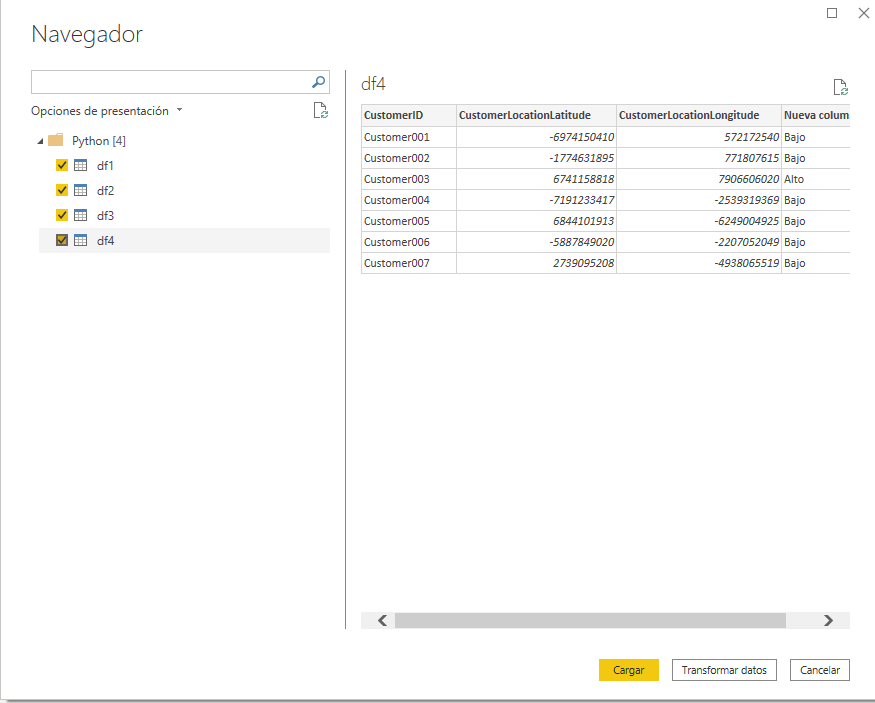